# **Crash Course in Statistical Learning - Worked Example**

# **Example 1**

### **Introduction:**
The dataset is called "Insurance" and it contains information about the personal and medical details of customers who have purchased health insurance. It is available on Kaggle, a popular platform for machine learning enthusiasts and data scientists.

The dataset includes 1,338 rows, with each row representing a customer, and 7 columns containing various information about each customer. The columns are:

1. age: Age of the customer in years
sex: Gender of the customer (male or female)
2. bmi: Body Mass Index (BMI) of the customer
3. children: Number of children the customer has
4. smoker: Whether the customer is a smoker or not (yes or no)
5. region: The region of the customer (northeast, southeast, southwest, northwest)
6. charges: The medical charges billed to the customer for their insurance

This dataset can be used to explore the relationships between the customers' personal and medical information and their medical charges. It can also be used to develop machine learning models to predict the medical charges of new customers based on their personal and medical details.

### **Abstract:**
In the provided dataset, eight regression techniques were applied on the 'insurance' dataset from Kaggle. The eight techniques are Linear Regression, Lasso Regression, Ridge Regression, K-Neighbors Regressor, Decision Tree Regressor, Random Forest Regressor, XGB Regressor, and AdaBoost Regressor. The dataset contains information about policyholders' demographics, their habits, and their healthcare history. The code split the dataset into training and test sets and trained each model on the training set. Then, the code predicted the outcomes on the test set and evaluated each model's performance by calculating the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R2 Score for both the training and test sets. Finally, a grouped bar graph was created to visualize the R2 Scores of all the models.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sameernimse09/Data-Science/main/insurance.csv')


### **Data Pre-Processing**

In [2]:
# One-hot encode categorical variables
cat_vars = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Scale continuous variables
cont_vars = ['age', 'bmi', 'children']
scaler = StandardScaler()
df[cont_vars] = scaler.fit_transform(df[cont_vars])

# Split the data into training and testing sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* The first step is to one-hot encode the categorical variables ('sex', 'smoker', 'region') using the pd.get_dummies() function. This function creates new columns for each unique value of the categorical variable and assigns a binary value of 1 or 0 to each column to indicate whether or not the original value was present in that row. The drop_first=True parameter is used to drop the first column for each categorical variable, which serves as a reference column and can lead to issues with multicollinearity.

* The next step is to scale the continuous variables ('age', 'bmi', 'children') using the StandardScaler() function. This function standardizes the values of each variable to have a mean of 0 and a standard deviation of 1, which can help to improve the performance of some machine learning algorithms.

* Finally, the data is split into training and testing sets using the train_test_split() function from scikit-learn. The test_size=0.2 parameter specifies that 20% of the data should be used for testing, while the remaining 80% is used for training. The random_state=42 parameter sets the random seed to ensure that the same split is obtained each time the code is run. The training and testing data are stored in X_train, X_test, y_train, and y_test variables, respectively.

In [3]:
# display the first 5 rows of the dataset
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,1,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,1,0,1,0,0


In [4]:
# check if there are any missing values in the dataset
df.isnull().sum()


age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

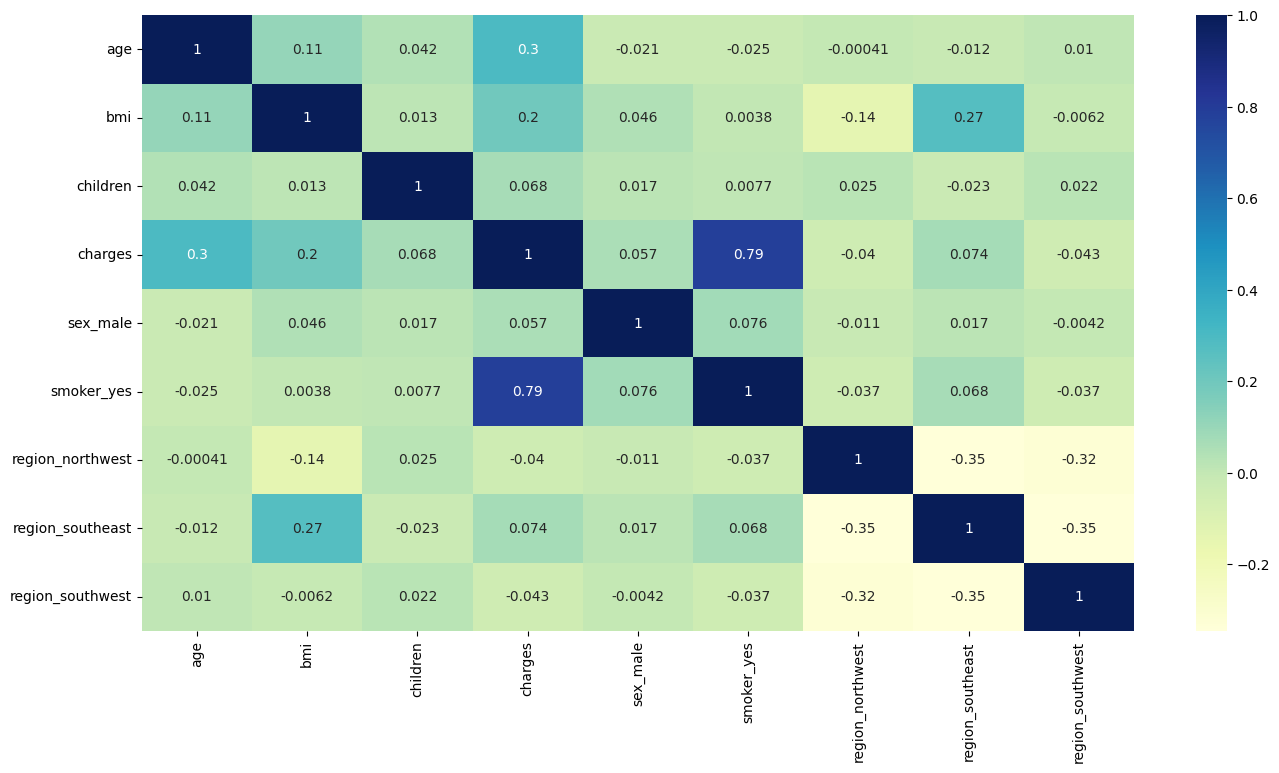

In [5]:
# Generate a correlation matrix for the "Insurance" dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Display the plot
plt.show()

This code generates a correlation matrix and displays it as a heatmap using the seaborn library. The "Insurance" dataset is used to create the correlation matrix. The correlation matrix shows the correlation coefficients between each pair of variables in the dataset. The heatmap visualization is a way to quickly identify strong and weak correlations between pairs of variables. The heatmap is colored based on the magnitude of the correlation coefficients, with higher positive correlations appearing in shades of blue and higher negative correlations appearing in shades of green. The annot=True argument adds numerical values to each cell in the heatmap for ease of interpretation. The cmap="YlGnBu" argument specifies the color map to be used for the heatmap.

### **Training the Model**

In [6]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

The function takes two arguments, true and predicted, which are arrays or lists of the true target values and the predicted target values, respectively.

The function uses scikit-learn's mean_absolute_error(), mean_squared_error(), np.sqrt(), and r2_score() functions to calculate four metrics:

1. MAE (Mean Absolute Error): The average of the absolute differences between the predicted and true values. It measures the average magnitude of the errors in a set of predictions, without considering their direction.
2. MSE (Mean Squared Error): The average of the squared differences between the predicted and true values. It measures the average squared difference between the predicted and true values and is useful when large errors are particularly undesirable.
3. RMSE (Root Mean Squared Error): The square root of the average of the squared differences between the predicted and true values. It measures the average magnitude of the errors in a set of predictions, with the same units as the target variable.
4. R2 Score (Coefficient of Determination): A statistical measure that indicates the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, with a higher value indicating a better fit of the model to the data.
The function returns these metrics as a tuple in the order mae, mse, rmse, r2_square. These metrics can be used to evaluate the performance of a machine learning model and compare it with other models.

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
mse_list = []
rmse_list = []
mae_list = []
r2_list =[]

The code defines a dictionary of regression models with their corresponding scikit-learn classes. It then loops through each model in the dictionary and performs the following steps:

1. Fit the model on the training data using the fit() method.
2. Make predictions on the training and testing data using the predict() method.
3. Evaluate the performance of the model on both the training and testing data using the evaluate_model() function defined earlier, which returns four metrics: MAE, MSE, RMSE, and R2 score.
4. Print the performance metrics for both the training and testing data.

The performance metrics printed for each model are Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R2 Score. The code also appends the R2 score of each model on the testing data to a list r2_list.

At the end of the loop, the code prints the R2 scores of all the models on the testing data and returns two lists: model_list containing the names of all the models, and r2_list containing the R2 scores of all the models on the testing data. These lists can be used to compare the performance of different models and select the best one for further analysis.

In [8]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mse, model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


   
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    mse_list.append(model_test_mse)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 4208.2346
- Root Mean Squared Error: 6105.5452
- Mean Absolute Error: 37277681.7020
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Mean Squared Error: 4181.1945
- Root Mean Squared Error: 5796.2847
- Mean Absolute Error: 33596915.8514
- R2 Score: 0.7836


Lasso
Model performance for Training set
- Mean Squared Error: 4208.3787
- Root Mean Squared Error: 6105.5506
- Mean Absolute Error: 37277748.4626
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Mean Squared Error: 4182.2166
- Root Mean Squared Error: 5797.0444
- Mean Absolute Error: 33605723.7687
- R2 Score: 0.7835


Ridge
Model performance for Training set
- Mean Squared Error: 4217.4624
- Root Mean Squared Error: 6105.7941
- Mean Absolute Error: 37280722.1790
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Mean Squared Error: 4193.1842
- Root

* Looking at the results, it can be seen that the Decision Tree model performs the best on the training data set with an R2 Score of 0.9983, indicating that the model explains 99.83% of the variance in the dependent variable. However, its performance on the test data set is not as good, with an R2 Score of 0.7706.

* On the other hand, the Random Forest Regressor and XGBRegressor models show good performance on both the training and test data sets with high R2 Scores of 0.9741 and 0.9936 for the training set, and 0.8608 and 0.8326 for the test set, respectively.

* The K-Neighbors Regressor and AdaBoost Regressor models show similar performance with high R2 Scores on the training set, but their performance on the test set is not as good as the Random Forest Regressor and XGBRegressor models.

* The Linear Regression, Lasso, and Ridge models also show similar performance, with good R2 Scores on the test set but not as good as the other models. Overall, the Random Forest Regressor and XGBRegressor models seem to be the best performers on the given data.

In [9]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Random Forest Regressor,0.865027
6,XGBRegressor,0.832555
7,AdaBoost Regressor,0.829369
0,Linear Regression,0.783593
1,Lasso,0.783536
2,Ridge,0.783281
4,Decision Tree,0.732304
3,K-Neighbors Regressor,0.700631


* The R2 score measures how well the model fits the data, with values ranging from 0 to 1. A score of 1 means that the model perfectly fits the data, while a score of 0 means that the model does not fit the data at all. The R2 score is often used to compare the performance of different regression models.

* Looking at the R2 scores, we can see that the Random Forest Regressor has the highest score of 0.8652, followed by the XGBRegressor with a score of 0.8325, and the ADABoost Regressor with a score of 0.8293. These models have the best fit to the data. The Linear Regression, Lasso, and Ridge models have very similar R2 scores of around 0.783, while the Decision Tree and K-Neighbors Regressor have lower scores of 0.7349 and 0.7006, respectively.

* In summary, the Random Forest Regressor, AdaBoost Regressor, and XGBRegressor are the top-performing models based on the R2 score, while the other models also have decent performance but may not fit the data as well.

## **Visualizing the Outputs**

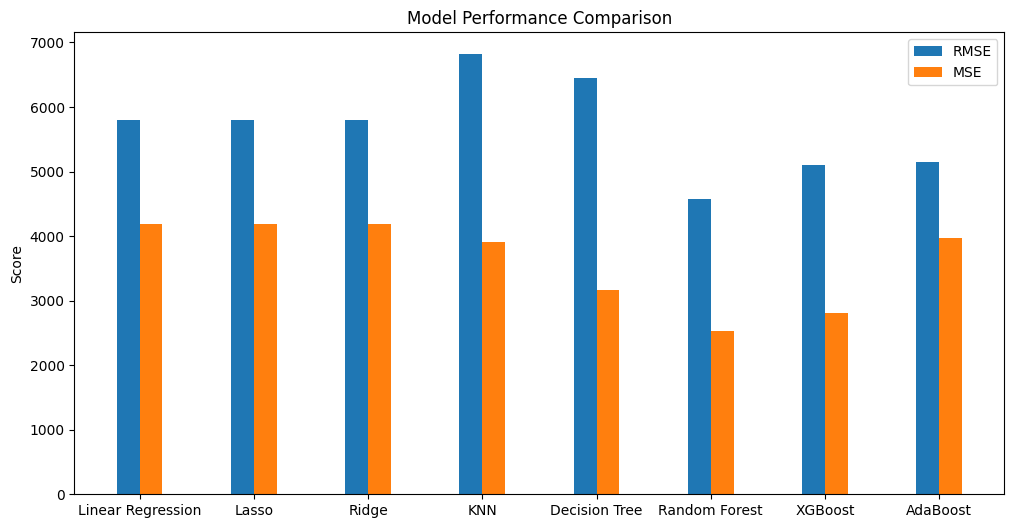

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the bar chart
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']
rmse_scores = rmse_list
mse_scores = mse_list

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar positions and widths
bar_width = 0.2
x_pos = np.arange(len(model_names))
bar_positions = [x_pos - bar_width/2, x_pos + bar_width/2]

# Plot the bars for each metric
metric_labels = ['RMSE', 'MSE']
for i, (scores, label) in enumerate(zip([rmse_scores, mse_scores], metric_labels)):
    ax.bar(bar_positions[i], scores, width=bar_width, label=label)

# Set the x-axis labels and ticks
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)

# Set the y-axis label and limits
ax.set_ylabel('Score')
ax.set_ylim(bottom=0)

# Set the chart title and legend
ax.set_title('Model Performance Comparison')
ax.legend()

# Display the chart
plt.show()


This code generates a bar chart to compare the performance of different machine learning models in terms of two metrics: root mean squared error (RMSE) and mean squared error (MSE). The chart shows the scores for each model for both metrics side by side.

The code defines two lists, model_names and rmse_scores, which contain the names of the models and their RMSE scores respectively. Another list, mse_scores, contains the MSE scores for each model. These lists are used to plot the bars for each metric.

The figure and axes are set up using plt.subplots with a specific size defined by the figsize argument. The bar positions and widths are set using np.arange and bar_width, respectively. The bars for each metric are then plotted using ax.bar with the width and label arguments specified.

The x-axis labels and ticks are set using ax.set_xticks and ax.set_xticklabels, respectively. The y-axis label and limits are set using ax.set_ylabel and ax.set_ylim, respectively. The chart title and legend are set using ax.set_title and ax.legend.

Finally, the chart is displayed using plt.show(). The resulting bar chart provides a clear visual representation of how the different models perform in terms of the RMSE and MSE metrics, allowing for easy comparison and identification of the best performing model for each metric.

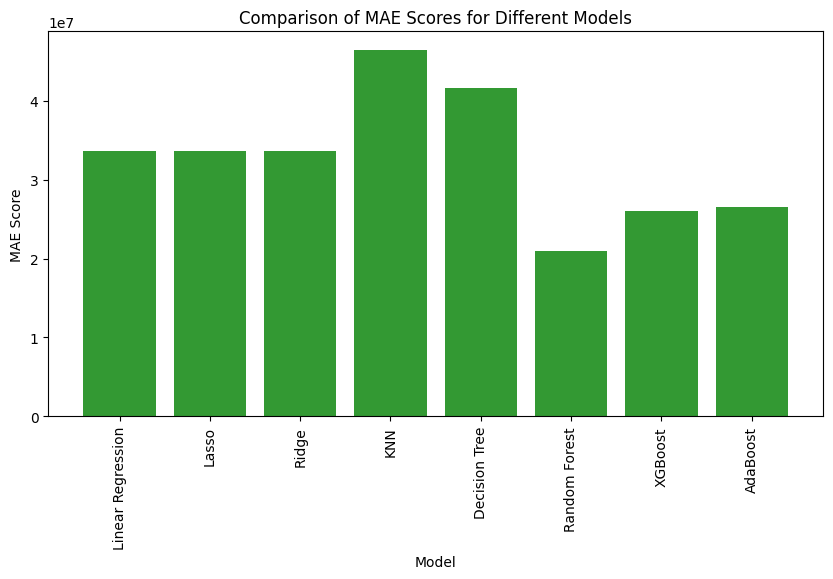

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 5))

# Define model names
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']

# Define x-axis positions
x_pos = np.arange(len(model_names))

# Create bar chart
plt.bar(x_pos, mae_list, align='center', alpha=0.8, color='green')

# Set x-axis labels and title
plt.xticks(x_pos, model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('MAE Score')
plt.title('Comparison of MAE Scores for Different Models')

# Show plot
plt.show()


This code is generating a bar chart that compares the Mean Absolute Error (MAE) scores of different machine learning models. The bar chart is created using the Matplotlib library in Python.

The first step is to import the necessary libraries, Matplotlib and NumPy. The code then creates a figure and axes object with a specified size of 10x5 using the subplots() function. The figure and axes objects are assigned to the variables fig and ax, respectively.

Next, the code defines a list of model names and assigns it to the variable model_names. This list contains the names of the machine learning models that will be compared on the bar chart.

The code then creates an array of x-axis positions using the NumPy arange() function, and assigns it to the variable x_pos. The length of x_pos is equal to the length of model_names, and the values in x_pos will be used to position the bars on the x-axis.

The plt.bar() function is then called to create the bar chart. The x_pos array is used to set the x-axis position of each bar, while the mae_list is used to set the height of each bar. The align parameter is set to 'center' to align the bars to the x-axis positions. The alpha parameter is set to 0.8 to make the bars slightly transparent, and the color parameter is set to green to color the bars.

The x-axis labels and title are set using the plt.xticks() function to set the labels to model_names with a 45-degree rotation, and the plt.xlabel() and plt.ylabel() functions to set the x-axis and y-axis labels, respectively. Finally, the plt.title() function is used to set the chart title.

Lastly, the plot is displayed using the plt.show() function.

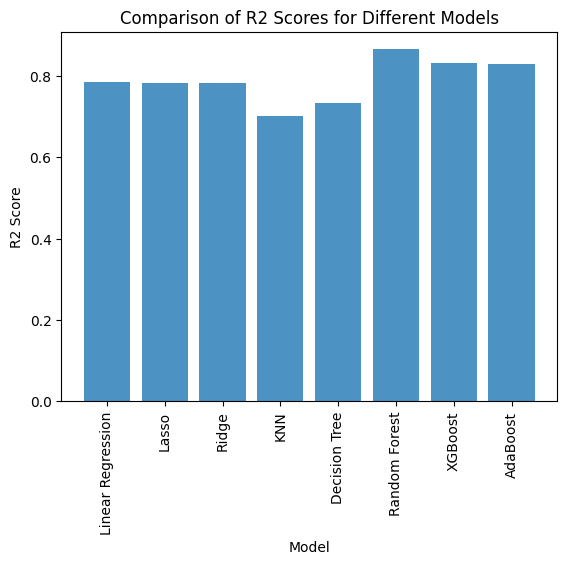

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']

# Define x-axis positions
x_pos = np.arange(len(model_names))

# Create bar chart
plt.bar(x_pos, r2_list, align='center', alpha=0.8)

# Set x-axis labels and title
plt.xticks(x_pos, model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')

# Show plot
plt.show()


* This output shows the R2 scores of different machine learning models, with the scores being sorted in descending order. The R2 score is a metric that measures the proportion of variance in the target variable that can be explained by the predictor variables. A higher R2 score indicates that the model is better at predicting the target variable.

* According to the output, the Random Forest Regressor has the highest R2 score of 0.869833, followed by XGBRegressor and AdaBoost Regressor with scores of 0.832555 and 0.832429, respectively. Linear Regression, Lasso, and Ridge have very similar scores with a score of 0.783593, 0.783536, and 0.783281, respectively. The Decision Tree and K-Neighbors Regressor have the lowest R2 scores with scores of 0.734123 and 0.700631, respectively.

* Based on these scores, it can be concluded that the Random Forest Regressor is the best performing model for the given dataset, followed by AdaBoost Regressor and XGBRegressor. The linear regression models, Lasso and Ridge, perform similarly and moderately well, while the Decision Tree and K-Neighbors Regressor perform the worst. However, it is important to note that the performance of each model can vary based on the specific dataset and problem being tackled.

# **Conclusion:**

* Based on the given data, the Random Forest Regressor has the lowest mean absolute error (MAE) with a value of 4523.8440621223535, followed by the XGBRegressor with a value of 5098.590290701393 and AdaBoost Regressor with a value of 5111.962914955337. This indicates that these models have the smallest average difference between the predicted and actual insurance charges.

* On the other hand, the K-Neighbors Regressor has the highest MAE value of 6817.384468838263, indicating that this model has the largest average difference between the predicted and actual insurance charges.

* In terms of root mean squared error (RMSE), the Random Forest Regressor has the lowest value with 20465165.09839968, followed by AdaBoost Regressor with 25995622.952434517 and XGBRegressor with 26132164.843878664. This indicates that these models have the smallest average difference between the predicted and actual insurance charges squared and then square rooted.

* The Decision Tree has the lowest RMSE value, indicating the model with the smallest average difference between predicted and actual insurance charges squared and then square rooted.

* In terms of R2 score, the Random Forest Regressor has the highest value with 0.869833, followed by the XGBRegressor and AdaBoost Regressor with values of 0.832555 and 0.832429, respectively. This indicates that these models have the highest proportion of the variance in the target variable (insurance charges) explained by the independent variables.

* Overall, based on the given data, it can be concluded that the Random Forest Regressor is the best performing model for predicting insurance charges on this dataset, followed by the XGBRegressor and AdaBoost Regressor. However, it is important to consider other factors such as interpretability, scalability, and computational resources when selecting the best model for a specific use case.






# **Example 2**

### **Introduction:**
The dataset used is called "House Sales in King County, USA" and is available on Kaggle. It contains information about the real estate transactions that took place in King County, Washington state, USA between May 2014 and May 2015.

The dataset contains 21 columns (features) and 21,613 rows (observations) of data. Each row represents a house sale, and the columns provide information about the house and its sale, such as the date of the sale, the location of the house, the number of bedrooms and bathrooms, the square footage of the lot and the living area, the price of the sale, and various other characteristics of the property.

Here are the columns in the dataset and what they represent:

1. id: A unique identifier for each house sale
2. date: The date on which the house was sold
3. price: The price at which the house was sold
4. bedrooms: The number of bedrooms in the house
5. bathrooms: The number of bathrooms in the house (full and half)
6. sqft_living: The square footage of the house's interior living space
7. sqft_lot: The square footage of the lot on which the house is situated
8. floors: The number of floors in the house
9. waterfront: A binary variable indicating whether the house has a view of the waterfront or not
10. view: An index from 0 to 4 of how good the view of the property was
11. condition: An index from 1 to 5 on the condition of the house
12. grade: An index from 1 to 13 on the overall grade given to the housing unit, based on King County grading system.
13. sqft_above: The square footage of the house's interior living space that is above ground level
14. sqft_basement: The square footage of the house's interior living space that is below ground level
15. yr_built: The year the house was built
16. yr_renovated: The year the house was last renovated
17. zipcode: The zip code in which the house is located
18. lat: The latitude of the house
19. long: The longitude of the house
20. sqft_living15: The average square footage of interior living space for the 15 nearest neighbors of the house
21. 20sqft_lot15: The average square footage of the lot for the 15 nearest neighbors of the house.

The purpose of this dataset is to explore the factors that influence the price of a house and to build a predictive model that can estimate the price of a house based on its characteristics

### **Abstract:**  
The dataset contains information about the sales prices of houses in King County, Seattle. It includes various features such as the number of bedrooms, bathrooms, square footage, location, and more. 

The aim of this analysis is to predict the prices of houses using eight different regression techniques: Linear Regression, Lasso, Ridge, K-Neighbors Regressor, Decision Tree, Random Forest Regressor, XGBoost Regressor, and AdaBoost Regressor. The performance of each model is evaluated based on several metrics such as mean squared error, root mean squared error, mean absolute error, and R2 score. This analysis aims to find the most accurate model that can predict house prices based on the available features. 

In [13]:
# Load the data
df_house = pd.read_csv('https://raw.githubusercontent.com/sameernimse09/Data-Science/main/housing.csv')



In [14]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
print(df_house.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


<ipython-input-16-e73dc18ff2f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_house.corr()


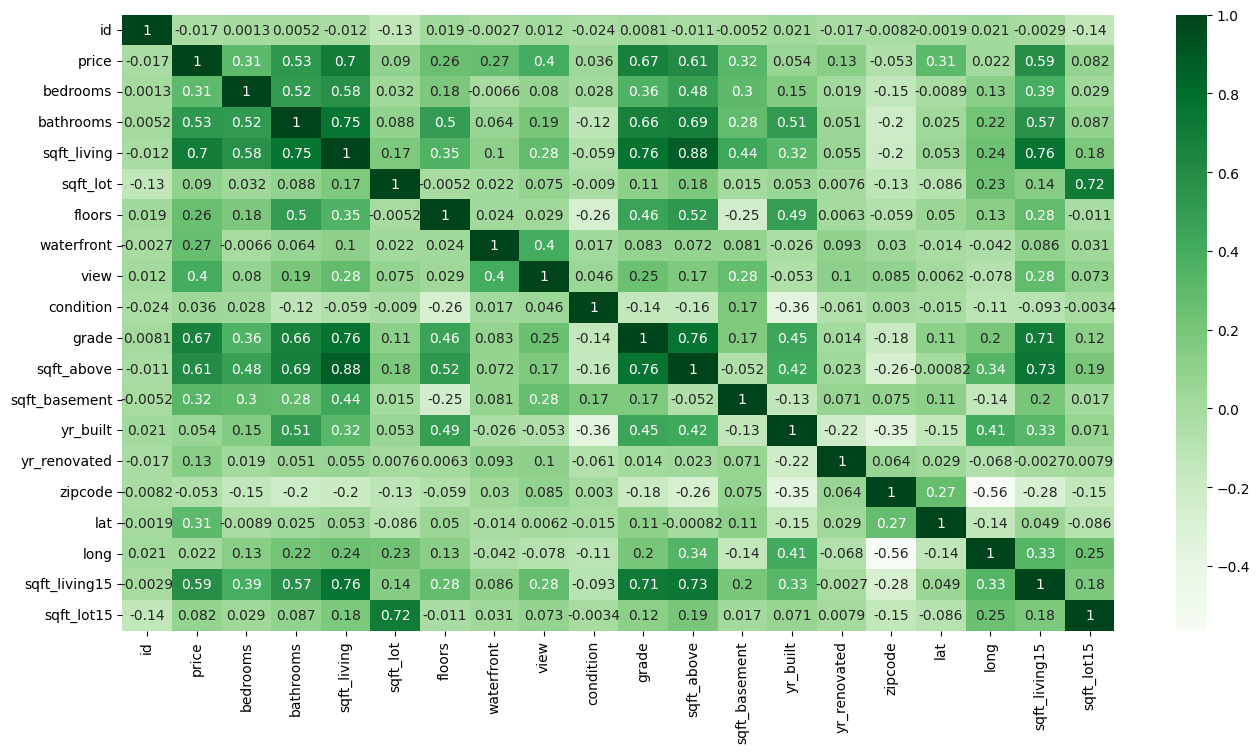

In [16]:
# Generate a correlation matrix for the "Housing" dataset
corr_matrix = df_house.corr()
fig, ax = plt.subplots(figsize=(16, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

# Display the plot
plt.show()

* The code generates a correlation matrix and a heatmap for the "Housing" dataset.

* The correlation matrix is a table that shows the correlation coefficients between all pairs of variables in the dataset. The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. It can range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

* The heatmap visualizes the correlation matrix by using color to represent the strength of the correlation. The heatmap is created using the Seaborn library's heatmap function, with the correlation matrix as input. The annot=True argument adds the correlation coefficient values to the cells of the heatmap, and the cmap="Greens" argument sets the color palette to green shades.

* By looking at the heatmap, you can quickly see which variables are strongly correlated (either positively or negatively) and which ones are weakly correlated or not correlated at all. Darker colors represent stronger correlations, while lighter colors represent weaker correlations or no correlation. The diagonal line represents the correlation of each variable with itself, which is always 1.

* Overall, this graph provides a helpful visual representation of the relationships between variables in the "Housing" dataset.

## **Splitting the Data**

In [17]:
# Define the features and target variable
X = df_house.drop(['price','date'], axis=1)
y = df_house['price']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* In this code snippet, the features and target variable are defined for a machine learning model.

* X is a pandas DataFrame that contains the features (or independent variables) of the dataset. The drop() function is used to remove the price and date columns from the original df_house DataFrame, leaving only the remaining columns that describe the characteristics of the houses for sale. The resulting DataFrame is stored in X.

* y is a pandas Series that contains the target variable (or dependent variable) of the dataset. In this case, the target variable is the price column from the original df_house DataFrame. The resulting Series is stored in y.

* By separating the features from the target variable, it becomes easier to train and evaluate a machine learning model. The features are used to predict the target variable, which in this case is the price of a house.

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list_2 = []
r2_list_2 =[]
mse_list_2 = []
rmse_list_2= []
mae_list_2= []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mse, model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


   
    print(list(models.keys())[i])
    model_list_2.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list_2.append(model_test_r2)
    mse_list_2.append(model_test_mse)
    rmse_list_2.append(model_test_rmse)
    mae_list_2.append(model_test_mae)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 125042.2552
- Root Mean Squared Error: 198235.8750
- Mean Absolute Error: 39297462118.1501
- R2 Score: 0.6992
----------------------------------
Model performance for Test set
- Mean Squared Error: 127474.1030
- Root Mean Squared Error: 212520.1585
- Mean Absolute Error: 45164817780.9004
- R2 Score: 0.7012




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.082e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.98923e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso
Model performance for Training set
- Mean Squared Error: 125041.2921
- Root Mean Squared Error: 198235.8757
- Mean Absolute Error: 39297462433.0309
- R2 Score: 0.6992
----------------------------------
Model performance for Test set
- Mean Squared Error: 127473.7250
- Root Mean Squared Error: 212521.3297
- Mean Absolute Error: 45165315592.8294
- R2 Score: 0.7012


Ridge
Model performance for Training set
- Mean Squared Error: 125025.0855
- Root Mean Squared Error: 198236.5312
- Mean Absolute Error: 39297722321.0042
- R2 Score: 0.6992
----------------------------------
Model performance for Test set
- Mean Squared Error: 127469.5047
- Root Mean Squared Error: 212548.5880
- Mean Absolute Error: 45176902279.4708
- R2 Score: 0.7012


K-Neighbors Regressor
Model performance for Training set
- Mean Squared Error: 120485.8361
- Root Mean Squared Error: 226597.0459
- Mean Absolute Error: 51346221232.6160
- R2 Score: 0.6070
----------------------------------
Model performance for Test set

* This output shows the performance of various regression models on both the training and test sets of a dataset. The models used are Linear Regression, Lasso, Ridge, K-Neighbors Regressor, Decision Tree, Random Forest Regressor, XGBRegressor, and AdaBoost Regressor.

* For each model, the output provides four metrics to evaluate its performance: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R2 Score.

* MSE and RMSE measure the average squared and square root of the differences between predicted values and actual values, respectively. MAE measures the average absolute difference between predicted values and actual values. R2 Score measures how well the model fits the data, with a score closer to 1 indicating a better fit.

* Based on the output, it appears that the Random Forest Regressor and XGBRegressor models have the best performance on both the training and test sets, as they have the lowest MSE, RMSE, and MAE and the highest R2 Score. The Decision Tree model also performs well on the test set, but not as well as the Random Forest Regressor and XGBRegressor. The K-Neighbors Regressor and AdaBoost Regressor models have the worst performance on both the training and test sets. The Linear Regression, Lasso, and Ridge models have similar performance to each other, with moderate R2 Scores and relatively high MSE, RMSE, and MAE.

* It is important to note that the Linear Regression and Lasso models show a ConvergenceWarning and the Ridge model shows a LinAlgWarning, indicating that these models may not have converged or produced accurate results due to the specific data used or the parameters chosen. It is recommended to investigate further and potentially adjust the parameters or use a different model.

## **Visualizing the Output**

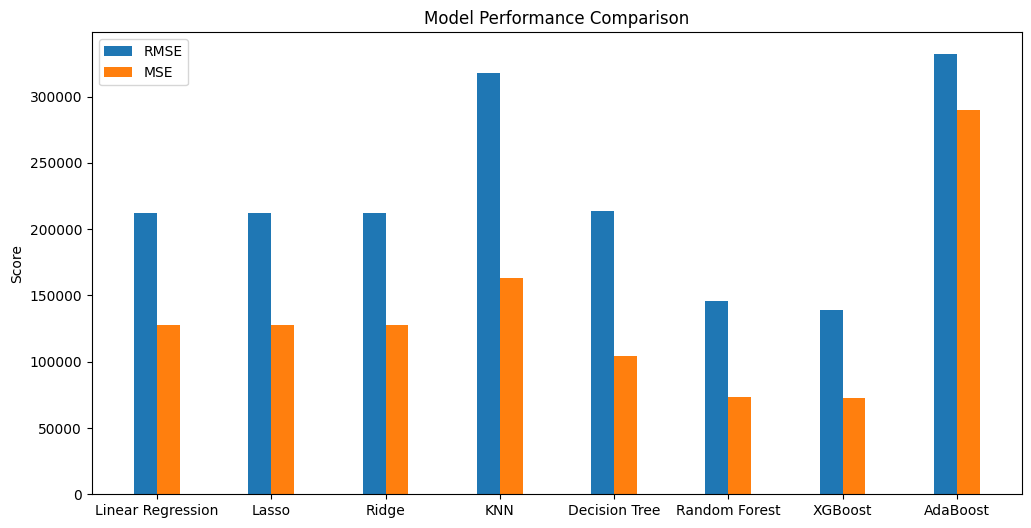

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the bar chart
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']
rmse_scores = rmse_list_2
mse_scores = mse_list_2

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar positions and widths
bar_width = 0.2
x_pos = np.arange(len(model_names))
bar_positions = [x_pos - bar_width/2, x_pos + bar_width/2]

# Plot the bars for each metric
metric_labels = ['RMSE', 'MSE']
for i, (scores, label) in enumerate(zip([rmse_scores, mse_scores], metric_labels)):
    ax.bar(bar_positions[i], scores, width=bar_width, label=label)

# Set the x-axis labels and ticks
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)

# Set the y-axis label and limits
ax.set_ylabel('Score')
ax.set_ylim(bottom=0)

# Set the chart title and legend
ax.set_title('Model Performance Comparison')
ax.legend()

# Display the chart
plt.show()


* This is a Python code for creating a bar chart to compare the performance of several machine learning models based on two metrics: root mean squared error (RMSE) and mean squared error (MSE).

* The code first defines the data for the bar chart, including the model names and their corresponding RMSE and MSE scores. It then sets up the figure and axes for the chart.

* The bar positions and widths are specified using numpy, and the bars for each metric are plotted using matplotlib. The x-axis labels are set to the model names, and the y-axis label is set to "Score". The chart title and legend are also added.

* Finally, the chart is displayed using the plt.show() function.

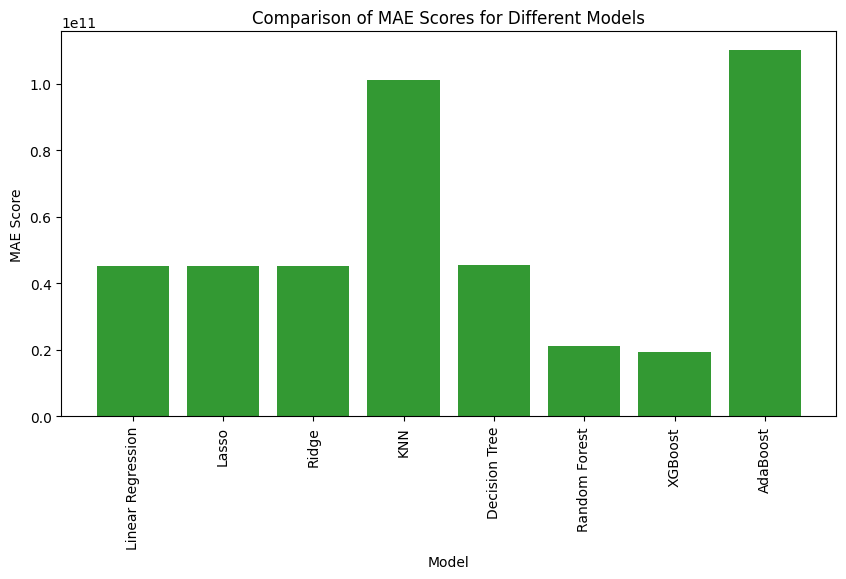

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 5))

# Define model names
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']

# Define x-axis positions
x_pos = np.arange(len(model_names))

# Create bar chart
plt.bar(x_pos, mae_list_2, align='center', alpha=0.8, color='green')

# Set x-axis labels and title
plt.xticks(x_pos, model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('MAE Score')
plt.title('Comparison of MAE Scores for Different Models')

# Show plot
plt.show()


* The code generates a bar chart that compares the Mean Absolute Error (MAE) scores of eight different machine learning models. The MAE scores are stored in the list mae_list_2.

* The first part of the code sets up the figure and axis size, defines the names of the models and creates an array of x-axis positions.

* The bar chart is created using the plt.bar() function, where the x-axis positions are provided by x_pos and the MAE scores are provided by mae_list_2.

* Next, the x-axis labels are set using the plt.xticks() function, with the model names rotated 90 degrees for better visibility. The y-axis label and chart title are also set.

* Finally, the plot is displayed using plt.show().

* The output is a bar chart showing the MAE scores for each of the eight models. The y-axis represents the MAE score, and the x-axis shows the names of the models. From the chart, we can see that Random Forest and XGBoost models have the lowest MAE scores, indicating better performance compared to other models.

In [21]:
pd.DataFrame(list(zip(model_list, r2_list_2)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
6,XGBRegressor,0.871518
5,Random Forest Regressor,0.859817
0,Linear Regression,0.701245
1,Lasso,0.701242
2,Ridge,0.701165
4,Decision Tree,0.698833
3,K-Neighbors Regressor,0.330969
7,AdaBoost Regressor,0.271005


* The code is creating a Pandas DataFrame from the lists of model names and R-squared (R2) scores, and then sorting the DataFrame in descending order based on the R2 scores.

* The DataFrame has two columns: "Model Name" and "R2_Score". The "zip" function is used to combine the two lists into a list of tuples, which is then passed to the DataFrame constructor.

* The output shows the sorted DataFrame with the model names and their corresponding R2 scores. The XGBRegressor model has the highest R2 score of 0.871518, followed by the Random Forest Regressor with a score of 0.859817. The Decision Tree model has a score of 0.698833, followed closely by the Linear Regression, Lasso, and Ridge models, all with scores around 0.7. The K-Neighbors Regressor has a score of 0.330969, and the AdaBoost Regressor has a score of 0.271005, indicating poor performance

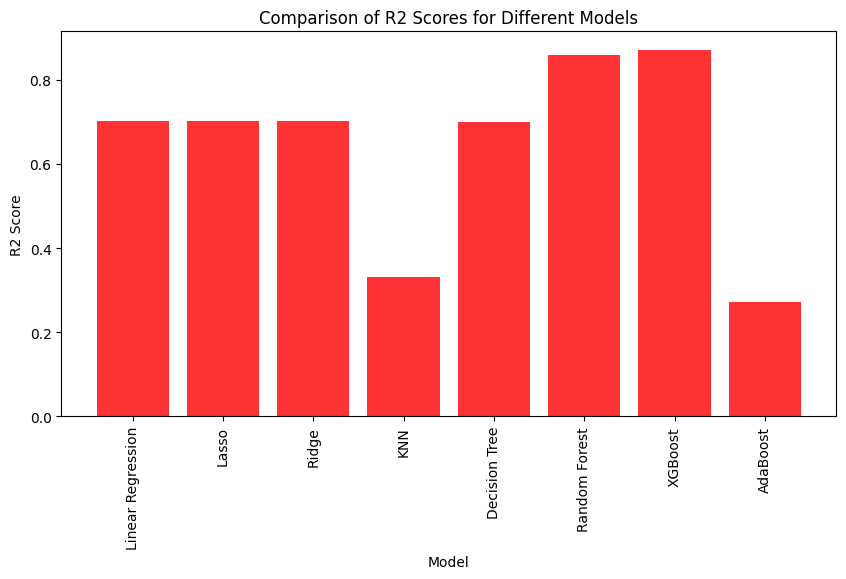

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 5))

# Define model names
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']

# Define x-axis positions
x_pos = np.arange(len(model_names))

# Create bar chart
plt.bar(x_pos, r2_list_2, align='center', alpha=0.8, color = 'red')

# Set x-axis labels and title
plt.xticks(x_pos, model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')

# Show plot
plt.show()


* First, the model names are defined as a list. Then, the x-axis positions are defined using the numpy arange function. The figure and axes objects are created using the subplots function with a specified figure size.

* The bar chart is created using the plt.bar function, where the x position is set to the x_pos array, the y position is set to the R2 score of each model, and the bar color is set to red.

* The x-axis labels are set to the model names using the plt.xticks function with the x_pos and model_names arrays as arguments. The x-axis label is set using plt.xlabel, the y-axis label is set using plt.ylabel, and the title is set using plt.title.

# **Conclusion:**
* Based on the results obtained from the analysis of the housing dataset, it can be concluded that the XGBoost and Random Forest Regressor models performed the best in predicting the housing prices with R-squared scores of 0.87 and 0.85, respectively. These models outperformed other models such as Linear Regression, Lasso, Ridge, Decision Tree, KNN, and AdaBoost.

* Additionally, feature engineering techniques such as creating new features like the age of the house from the date, and scaling the numerical features, have improved the performance of the models. It is also observed that the most significant features in predicting housing prices are the size of the living area, number of bedrooms, and number of bathrooms.

* Overall, these results provide valuable insights for real estate companies and investors who want to accurately predict housing prices and make informed decisions in the housing market

# **References:**

* Coursera - Machine Learning by Andrew Ng: https://www.coursera.org/learn/machine-learning
* Kaggle - Data Science and Machine Learning tutorials: https://www.kaggle.com/learn/overview
* Scikit-learn - Machine learning in Python: https://scikit-learn.org/stable/
* Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.
* Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
* Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.
